#System version

In [1]:
!python --version

Python 3.11.11


In [2]:
import sys
sys.version


'3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]'

In [3]:
import sys

if sys.version_info.major == 3 and sys.version_info.minor ==11 and sys.version_info.micro == 11:
  print("correct python version")
else:
  print("please use python version 3.10.11 for colab")



correct python version


## importing book

In [4]:
!pip install numpy==2.0.2
!pip install pandas
!pip install matplotlib

In [5]:
  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt


In [6]:
import requests

url = 'https://www.gutenberg.org/files/244/244-0.txt'
response = requests.get(url)

# givngencoding
response.encoding = 'utf-8'

# Check if the request was successful
if response.status_code == 200:
    # Get the book text from the response
    raw_book_text = response.text

    # Indent the with block correctly under the if statement
    with open(file='content/raw_book.txt', mode='w', encoding='utf-8') as f: # Fixed the file name to be a string. The 'w' should also be a string.
        print('book downloaded')
        print("Book text fetched successfully!")
        f.write(raw_book_text) # added the file write
else:
    print("Failed to fetch book text.")
raw_book_text = response.text

FileNotFoundError: [Errno 2] No such file or directory: 'content/raw_book.txt'

In [ ]:
pip show requests

In [ ]:
raw_book_text[:1000]

## stripping content of book between start and end
### means removing header footer metadata

In [ ]:

#def remove_header_footer_metadata():
start_marker="*** START OF THE PROJECT GUTENBERG EBOOK"
end_marker="*** END OF THE PROJECT GUTENBERG EBOOK"

start_index=raw_book_text.find(start_marker)+len(start_marker)

end_index=raw_book_text.find(end_marker)

cleaned_text=raw_book_text[start_index:end_index].strip()

print('remove metadata header and footer')


In [ ]:
cleaned_text[:1000]

## removing extra spaces , non ascii characters  and spcial characters

In [ ]:
import re

# Remove extra spaces, special symbols, and non-ASCII characters
# Replace multiple spaces with a single space
cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
# Remove non-ASCII characters
cleaned_text = re.sub(r'[^\x00-\x7F]+', ' ', cleaned_text)
# Remove special symbols except basic punctuation
cleaned_text = re.sub(r'[^\w\s.,!?]', '', cleaned_text)

print("Unwanted characters removed!")

In [ ]:
cleaned_text[:1000]


In [ ]:
#in lower
cleaned_text=cleaned_text.lower()

In [ ]:
cleaned_text[:1000]

In [ ]:
with open(file='cleaned_text_book.txt', mode='w', encoding='utf-8') as f: # Fixed the file name to be a string. The 'w' should also be a string.
    print('clean book downloaded')

    f.write(cleaned_text) # added the file write

In [ ]:
only_text=cleaned_text[861:]


In [ ]:
only_text

In [ ]:
with open(file='only_book_text_content.txt',mode='w',encoding='utf-8')as f:
  print('only_book_text_content.txt is generated')
  # added the file write
  f.write(only_text)

## stopwords removal

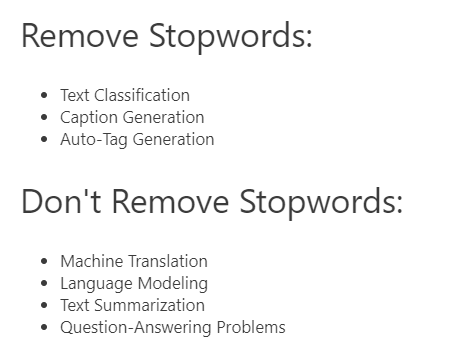

## wordcloud

In [ ]:
!pip install wordcloud

In [ ]:
pip show wordcloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## preforming booknlp


## nlp pipline used to process long txt like books

## **using booknlp**

#### to use booknlp we have to install java it is a requirement

In [ ]:
#installing java
!apt-get update
!apt-get install -y openjdk-11-jdk
!update-alternatives --set java /usr/lib/jvm/java-11-openjdk-amd64/jre/bin/java

# Verify Java installation
!java -version

In [ ]:
!javac -version

In [ ]:
# Install dependencies
!git clone https://github.com/booknlp/booknlp.git
%cd booknlp
#download all thingsthat all listed in setup.py
!pip install -e .

In [ ]:
# Install BookNLP and its dependencies

!pip install "booknlp==1.0.7"


In [ ]:
# !python -m spacy download en_core_web_sm

In [ ]:
pip show spacy

In [ ]:
import booknlp
print(booknlp.__file__)  # This gives the package location

In [ ]:
# # Clear the Hugging Face cache to avoid corrupted weights
# import shutil
# import os
# cache_dir = os.path.expanduser("~/.cache/huggingface")
# if os.path.exists(cache_dir):
#     shutil.rmtree(cache_dir)
#     print("clear cache")


In [ ]:
## shutil gonna be apply here

In [ ]:
!wget https://github.com/mohdabuzaransari9/Interactive-literary-characters-ai/raw/main/booknlp_libary_updated_files.zip

In [ ]:

#unzip
from zipfile import ZipFile
zip_ref=ZipFile(r"/content/booknlp_libary_updated_files.zip")
zip_ref.extractall()
zip_ref.close()


In [ ]:


import os


for root, dirs, files in os.walk('/content/files_update_for_booknlp_library'):
  for dir_name in dirs:
    print(os.path.join(root, dir_name))
  for file_name in files:
    print(os.path.join(root, file_name))





In [ ]:
import shutil
import os

# Define the source files
source_files = [
    "/content/files_update_for_booknlp_library/litbank_coref.py",
    "/content/files_update_for_booknlp_library/bert_qa.py",
    "/content/files_update_for_booknlp_library/entity_tagger.py",
    "/content/files_update_for_booknlp_library/entity_cat.tagset"
]

destination = "/content/booknlp/booknlp/english/"  #  path


os.makedirs(destination_directory, exist_ok=True)

# Copy each file to the destination directory (overriding if they exist)
for file_path in source_files:
    if os.path.exists(file_path):
        shutil.copy(file_path, destination_directory)
        print(f"updating library files {file_path} to {destination_directory}")
    else:
        print(f"File not found: {file_path}")

In [ ]:
#vereify file
!file booknlp_libary_updated_files.zip
!ls -lh booknlp_libary_updated_files.zip

In [ ]:
!ls /content

In [ ]:
# importing booknlp class
from booknlp.booknlp import BookNLP
model_params={
		"pipeline":"entity,quote,supersense,event,coref",
		"model":"big",
    "book_id" : "a_scarlet_study"
	}



In [ ]:
booknlp=BookNLP("en",model_params=model_params)

# Input and output paths
input_file = "/content/files/only_book_text_content.txt"  # Adjust the path if your file is in a different directory
output_dir = "/content/booknlp/booknlp_output"  # Output will be saved in the working directory
book_id = "a_scarlet_study"  # Use underscores or avoid spaces for compatibility

# Ensure the output directory exists
import os
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Your processing code here (e.g., running BookNLP or other text processing)
# Example: Print the input file path and output directory for verification
print(f"Input file: {input_file}")
print(f"Output directory: {output_dir}")
print(f"Book ID: {book_id}")


## **18-20 min processing**

In [ ]:
%%time

# Process the book
booknlp.process(input_file, output_dir,book_id)

In [ ]:
wait here ..........................

In [ ]:
# file_path = "/kaggle/working/booknlp/booknlp/english/bert_qa.py"

# # Read the file
# with open(file_path, "r") as file:
#     lines = file.readlines()

# # Replace the problematic line
# with open(file_path, "w") as file:
#     for line in lines:
#         if "self.model.load_state_dict(torch.load(modelFile, map_location=device))" in line:
#             file.write('state_dict = torch.load(modelFile, map_location=device)\n')
#             file.write('del state_dict["bert.embeddings.position_ids"]\n')
#             file.write('self.model.load_state_dict(state_dict)\n')
#         else:
#             file.write(line)

In [ ]:
# file_path = "/kaggle/working/booknlp/booknlp/english/entity_tagger.py"

# # Read the file
# with open(file_path, "r") as file:
#     lines = file.readlines()

# # Replace the problematic line
# with open(file_path, "w") as file:
#     for line in lines:
#         if "self.model.load_state_dict(torch.load(model_file, map_location=device))" in line:
#             file.write('state_dict = torch.load(model_file, map_location=device)\n')
#             file.write('del state_dict["bert.embeddings.position_ids"]\n')
#             file.write('self.model.load_state_dict(state_dict)\n')
#         else:
#             file.write(line)

In [ ]:
# file_path = "/kaggle/working/booknlp/booknlp/english/lithank_coref.py"

# # Read the file
# with open(file_path, "r") as file:
#     lines = file.readlines()

# # Replace the problematic line
# with open(file_path, "w") as file:
#     for line in lines:
#         if "self.model.load_state_dict(torch.load(model_file, map_location=device))" in line:
#             file.write('state_dict = torch.load(model_file, map_location=device)\n')
#             file.write('del state_dict["bert.embeddings.position_ids"]\n')
#             file.write('self.model.load_state_dict(state_dict)\n')
#         else:
#             file.write(line)

In [ ]:
# import shutil

# # Define the source and destination paths
# source_dir = "/kaggle/input/booknlp-updated-files/"  # Update this path
# destination_dir = "/kaggle/working/booknlp/booknlp/english/"

# # List of files to copy
# files_to_copy = ["bert_qa.py", "entity_tagger.py", "litbank_coref.py"]

# # Copy each file
# for file_name in files_to_copy:
#     shutil.copy(f"{source_dir}/{file_name}", f"{destination_dir}/{file_name}")
#     print(f"Copied {file_name} to {destination_dir}")

In [ ]:
import os
print(os.listdir(outpu_dir))

In [ ]:

# List output files
import os
print(os.listdir("output_dir"))

In [ ]:
wait here ...............................

## The output from the BookNLP pipeline is three types of files:


1.   TSV files (.tokens, .entities, .quotes, .supersense),
2.   JSON file (.book)
3.   HTML file (.book.html)


## **download the output files**

In [ ]:
from google.colab import files
files.download('/content/raw_book.txt')

In [ ]:
from google.colab import files
files.download('/content/cleaned_text_book.txt')


In [ ]:
from google.colab import files
files.download('/content/only_book_text_content.txt')

## **Zipping the booknlp_output folder**

### !zip -r file_name.zip "foldername"

###   -r standsfor recursive

In [ ]:
!zip -r output.zip '/content/booknlp_output'

In [ ]:
from google.colab import files
files.download('booknlp_output.zip')

In [ ]:
df_entities = pd.read_csv("/content/booknlp_output/a study n scarlet.entities", delimiter="\t")
df_entities

In [ ]:
df_quotes = pd.read_csv("/content/booknlp_output/a study n scarlet.quotes", delimiter="\t")
df_quotes

In [ ]:
df_supersense = pd.read_csv('/content/booknlp_output/a study n scarlet.supersense', delimiter="\t")
df_supersense

## **creating dataframe**

## **huggingface**

In [ ]:
!pip install huggingface_hub --quiet

In [ ]:
import huggingface_hub

huggingface_hub.login()

In [ ]:
from google.colab import userdata

HF_TOKEN=userdata.get('HF_TOKEN')


In [ ]:
!pip install "datasets<3"

In [ ]:
!pip install "datasets<=2.1.0" #Downgrade to a compatible version
import datasets


In [ ]:
try:
    import random
    import torch
    import evaluate
    import accelerate
    import transformers
    import gradio as gr

except ModuleNotFoundError:
  !pip install -U evaluate accelerate gradio

print(f'[INFO] torch version {torch.__version__}')
print(f'[INFO] transformers version {transformers.__version__}')
print(f'[INFO] datasets version {datasets.__version__}')


In [ ]:
pip show torch datasets evaluate accelerate transformers gradio


In [ ]:
from transformers import AutoTokenizer

tokenizer= AutoTokenizer.from_pretrained(pretrained_model_name_or_path='mistralai/Mistral-7B-v0.1',
                                        use_fast=True)
tokenizer

In [ ]:
tokenizer("potato")

In [ ]:
tokenizer.vocab

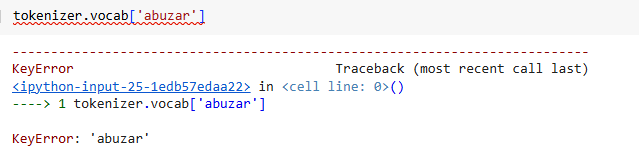

In [ ]:
tokenizer('abuzar')

In [ ]:
tokenizer.convert_ids_to_tokens(tokenizer('abuzar').input_ids)

## **freeze > requirements.txt**

In [ ]:
!pip list

In [ ]:
pip freeze > requirements.txt

In [ ]:
from google.colab import files
files.download('/content/requirements.txt')

In [ ]:
!pip install --upgrade pip